In [22]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

In [54]:
start_date = '2022-6-26'
history_map = {}
for symbol in ['SMH','USD','QQQ','TQQQ','NVDA','FNGU','FNGS','MAGS','MAGX','MAG7.L','NVD3.L','QQQ5.L']:
    tickerData = yf.Ticker(symbol)
    history = tickerData.history(interval='1wk', start=start_date, end=date.today()) # prices are adjusted for splits
    print(f'{symbol} history: {len(history)}w')
    history_map[symbol] = history

SMH history: 105w
USD history: 105w
QQQ history: 105w
TQQQ history: 105w
NVDA history: 105w
FNGU history: 105w
FNGS history: 105w
MAGS history: 64w
MAGX history: 18w
MAG7.L history: 12w
NVD3.L history: 105w
QQQ5.L history: 105w


In [24]:
rows = []
for symbol in history_map:
    history = history_map[symbol]
    C2L = (history['Low'].shift(-1) / history['Close'] - 1) * 100
    rows.append({
        'symbol': symbol,
        'C2L 20%': C2L.quantile(0.2),
        'C2L 50%': C2L.quantile(0.5),
        'C2L 80%': C2L.quantile(0.8),
    })
C2L = pd.DataFrame(rows)
print(C2L)

   symbol    C2L 20%   C2L 50%   C2L 80%
0     SMH  -3.927866 -2.072165 -0.576639
1     USD  -7.880015 -4.282400 -1.067712
2     QQQ  -2.366239 -1.178423 -0.218179
3    TQQQ  -7.217741 -3.543280 -0.681226
4    NVDA  -4.966700 -2.949307 -0.558056
5    FNGU -10.536376 -5.674349 -1.163116
6    FNGS  -3.452487 -1.720814 -0.382987
7    MAGS  -2.534836 -1.418602 -0.246708
8    MAGX  -3.902742 -2.373540 -0.515280
9  MAG7.L -11.325920 -8.487400 -3.383988


In [29]:
# Plot median stock change over number of weeks
max_weeks = 26
df = pd.DataFrame()


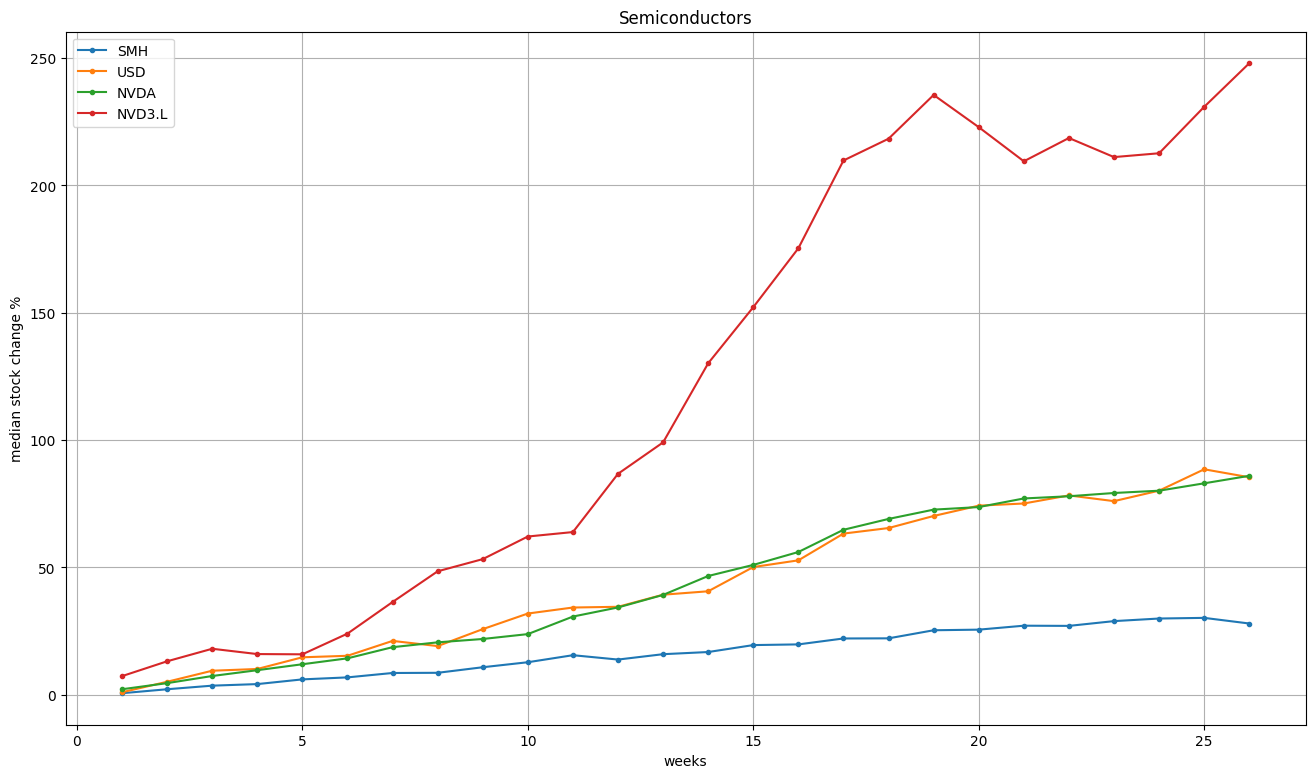

In [52]:
symbols = ['SMH','USD','NVDA','NVD3.L']
for symbol in symbols:
    history = history_map[symbol]
    stock_change_median = [None]
    for weeks in range(1, max_weeks+1):
        if len(history) <= weeks:
            stock_change_median.append(None)
        else:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            stock_change_median.append(stock_changes.median())
    # plt.plot(stock_change_median, label=symbol, marker='.')
    df[symbol] = stock_change_median

df[symbols].plot(figsize=(16,9), marker='.')
plt.legend()
plt.title('Semiconductors')
plt.xlabel('weeks')
plt.ylabel('median stock change %')
plt.grid()


In [43]:
print(f'USD:SMH {(df.USD / df.SMH).median():.1f}')
print(f'NVD3.L:NVDA {(df["NVD3.L"] / df.NVDA).median():.1f}')

USD:SMH 2.5
NVD3.L:NVDA 2.7


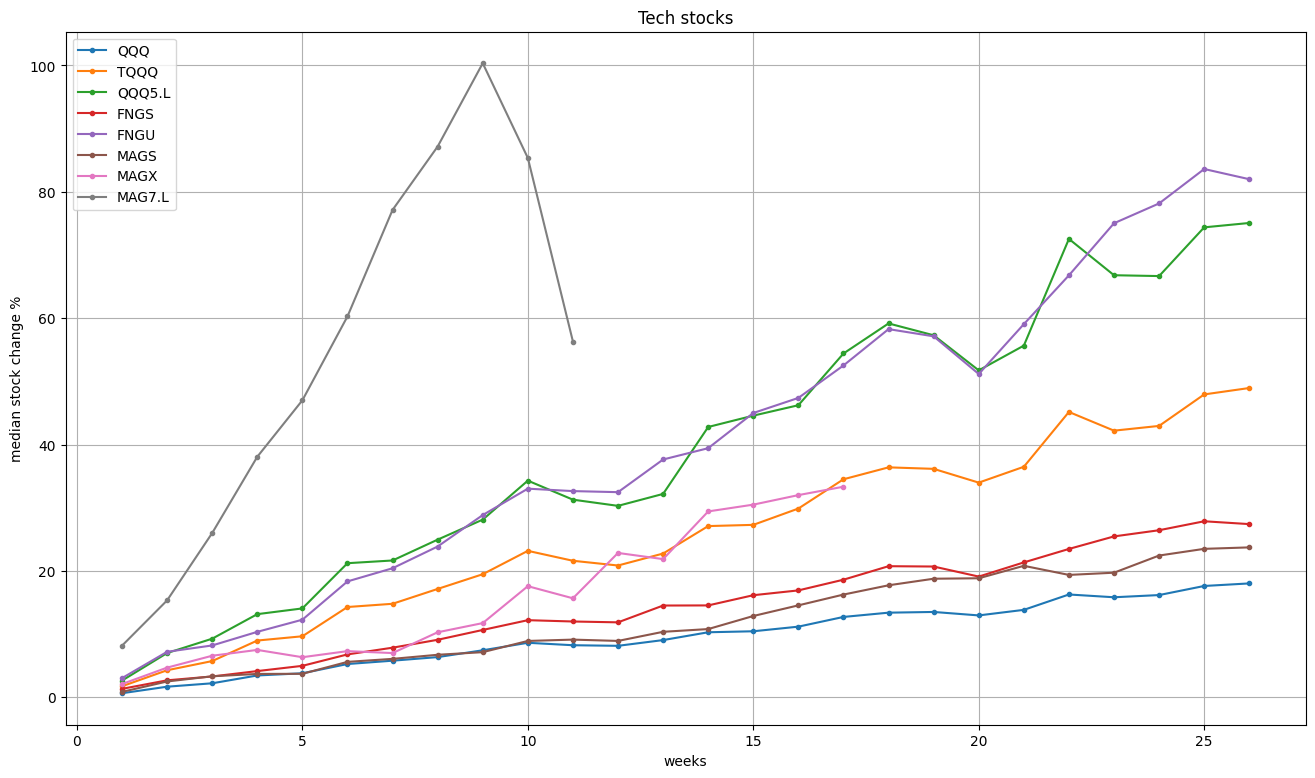

In [53]:
symbols = ['QQQ','TQQQ','QQQ5.L','FNGS','FNGU','MAGS','MAGX','MAG7.L']
for symbol in symbols:
    history = history_map[symbol]
    stock_change_median = [None]
    for weeks in range(1, max_weeks+1):
        if len(history) <= weeks:
            stock_change_median.append(None)
        else:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            stock_change_median.append(stock_changes.median())
    df[symbol] = stock_change_median

df[symbols].plot(figsize=(16,9), marker='.')
plt.legend()
plt.title('Tech stocks')
plt.xlabel('weeks')
plt.ylabel('median stock change %')
plt.grid()


In [46]:
print(f'TQQQ:QQQ {(df.TQQQ / df.QQQ).median():.1f}')
print(f'QQQ5.L:QQQ {(df["QQQ5.L"] / df.QQQ).median():.1f}')
print(f'FNGU:FNGS {(df.FNGU / df.FNGS).median():.1f}')
print(f'MAGX:MAGS {(df.MAGX / df.MAGS).median():.1f}')
print(f'MAG7.L:MAGS {(df["MAG7.L"] / df.MAGS).median():.1f}')

TQQQ:QQQ 2.6
QQQ5.L:QQQ 4.1
FNGU:FNGS 2.7
MAGX:MAGS 2.0
MAG7.L:MAGS 10.3
